In [8]:
#Library Load  #We are gonna use Functional Keras

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Input
from keras.utils import to_categorical
from keras.utils import np_utils

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
#Dataset Load

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape) # needs the depth dimension
print(y_train.shape) # its not one hot encoded

(60000, 28, 28)
(60000,)


In [3]:
#Data Preperation

img_H = x_train.shape[1]
img_W = x_train.shape[2]
depth= 1 #grayscale

input_shape = (img_H, img_W, depth)

#we convert our shape from 60000,28,28 to 60000,28,28,1 (we needed the depth)
x_train = x_train.reshape(x_train.shape[0], img_H, img_W, depth)  #instead of shape, I could have used -1
x_test = x_test.reshape(x_test.shape[0], img_H, img_W, depth)

# we change our image type to float32 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# image normalization max 255 becomes 1
x_train = x_train/255
x_test = x_test/255

print(x_train.shape)

#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)


(60000, 28, 28, 1)
(60000, 10)


In [4]:
#Extra information

no_classes = y_train.shape[1]
no_pixels= img_W*img_H #in one image

print(no_classes)
print(no_pixels)

10
784


In [5]:
#Model Architecture 

i = Input(shape=(img_H, img_W, depth)) #We define the input shape #heightxwidthXdepth

#Convolutional Layers
x = Conv2D(filters=32, kernel_size=(3,3), padding="same")(i) #default padding is valid
x = BatchNormalization()(x) #Batch Norm is added after the convolution operation and before the  ReLU
x = Activation("relu")(x)
x = MaxPooling2D(padding="same")(x) #default values are strides = 2 and filter dimensions = 2 
#28x28x1 --> 28x28x32 --> 14x14x32
x = Conv2D(filters=64, kernel_size=(3,3), padding="same")(x) #default padding is valid
x = BatchNormalization()(x) #Batch Norm is added after the convolution operation and before the  ReLU
x = Activation("relu")(x)
x = MaxPooling2D(padding="same")(x) #default values are strides = 2 and filter dimensions = 2 
#14x14x32 --> 14x14x64 --> 7x7x64
x = Conv2D(filters=128, kernel_size=(3,3), padding="same")(x) #default padding is valid
x = BatchNormalization()(x) #Batch Norm is added after the convolution operation and before the  ReLU
x = Activation("relu")(x)
x = MaxPooling2D(padding="same")(x) #default values are strides = 2 and filter dimensions = 2 
#7x7x64 --> 7x7x128 --> 4x4x128 ### PADDING SAME WITH ODD VALUE ON MAX POOLING ###

#Flattening
x = Flatten()(x) #4x4x128=2048 features  dim = (-1,2048)

#Fully Connected Layers
x = Dense(units=128)(x) #128 neurons
x = Activation('relu')(x)
x = Dropout(0.5)(x)#Dropout probability to drop a neuron #Dropout is added after the activation
x = Dense(units=no_classes)(x)#Where k is the no classes
x = Activation('softmax')(x)#Here on the contrary with tensorflow we have to manually add the softmax layer


#Compile the model
model = Model(inputs = i, outputs=x ) #we need to define the input and the output of the model

#Model Architecture Visualization

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [6]:
#Loss Function, Optimizer and metrics

model.compile(loss = "categorical_crossentropy", #used for multiple class problems
             optimizer = "adam",
             metrics = ["accuracy"])



In [7]:
#Training

#keras could also split the data for us using  validation split option (=0.2)
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size = 32) #default verbose is 1

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 271us/step - loss: 0.2390 - acc: 0.9258 - val_loss: 0.0445 - val_acc: 0.9873
Epoch 2/15
60000/60000 [==============================] - 14s 226us/step - loss: 0.1126 - acc: 0.9664 - val_loss: 0.0402 - val_acc: 0.9878
Epoch 3/15
60000/60000 [==============================] - 14s 226us/step - loss: 0.0860 - acc: 0.9739 - val_loss: 0.0315 - val_acc: 0.9895
Epoch 4/15
60000/60000 [==============================] - 13s 223us/step - loss: 0.0701 - acc: 0.9780 - val_loss: 0.0306 - val_acc: 0.9908
Epoch 5/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.0571 - acc: 0.9827 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 6/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.0476 - acc: 0.9862 - val_loss: 0.0216 - val_acc: 0.9933
Epoch 7/15
60000/60000 [==============================] - 14s 233us/step - loss: 0.0412 - acc: 0.9876 - val_loss: 0.

In [9]:
print("Returned", r)
print(r.history) #history is a dictionary that contains lists. These lists contain the losses that were found above

print(r.history.keys()) #keys() returns the available dictionary keys

Returned <keras.callbacks.History object at 0x00000189A77FC940>
{'val_loss': [0.044546553341065734, 0.04020343110186696, 0.03149124294475896, 0.030554056466098156, 0.0257640941104808, 0.021611036748021478, 0.02190264706503058, 0.03256600755994741, 0.025654756788548276, 0.029382453522242485, 0.025591338929560472, 0.045948741107643264, 0.038290955600108825, 0.03495827702714489, 0.029186722555387654], 'val_acc': [0.9873, 0.9878, 0.9895, 0.9908, 0.9918, 0.9933, 0.9936, 0.9913, 0.9934, 0.9923, 0.9939, 0.991, 0.9921, 0.9935, 0.9934], 'loss': [0.2389682518608868, 0.11263044021738072, 0.08604141373430224, 0.07010109862022801, 0.05710207850730512, 0.04757635415536934, 0.04118760429666145, 0.03254448088565829, 0.028100107400375662, 0.02484382780087229, 0.022411597010476302, 0.018846210939849485, 0.01701831487174571, 0.016484538668756432, 0.013394972864492411], 'acc': [0.9258333333333333, 0.9663833333333334, 0.9738833333333333, 0.9779666666666667, 0.98275, 0.9862166666666666, 0.9876166666666667, 

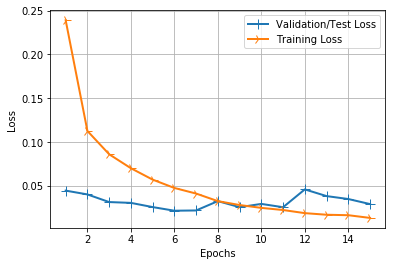

In [10]:
#Plot our results(loss)

history_dict = r.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) #we create the x axis which represents the epochs  (+1 in order to contain the final epoch)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss') #x, y, curve name
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0) #line "info"
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True) #our image has boxes
plt.legend()  # plots the name of each curve
plt.show()

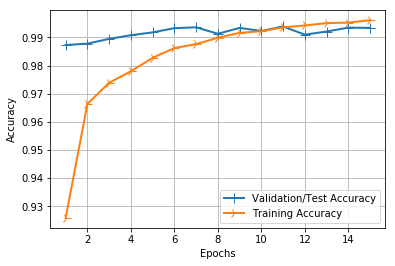

In [11]:
# Plot our results(accuracy)
import matplotlib.pyplot as plt

history_dict = r.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)  #we create the x axis which represents the epochs  (+1 in order to contain the final epoch)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')#x, y, curve name
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)#line "info"
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)#our image has boxes
plt.legend()# plots the name of each curve
plt.show()

In [12]:
#We could improve our accuracy by implementing an early stop since the accuracy after the 11th epoch gets worse 11acc :0.9939 15acc:0.9934

In [14]:
#Model saving

model.save("Keras_hand_writting_recognition.h5")
print("Model Saved")

Model Saved


In [15]:
#Model loading

#from keras.models import load_model

#classifier = load_model('"Keras_hand_writting_recognition.h5"')

In [13]:
#Check if you are using the gpu version of keras

from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

['/job:localhost/replica:0/task:0/device:GPU:0']
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12415854925739535887
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6689526907
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12698586958330258374
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
